In [2]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN

from numpy import mean
from numpy import std
from numpy import percentile

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data import

In [5]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000
1,1,2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000
2,2,2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000
3,3,2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000
4,4,2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000
...,...,...,...,...,...,...,...
6045,6045,2024-01-12,155.389999,156.199997,154.009995,154.619995,40460300
6046,6046,2024-01-16,153.529999,154.990005,152.149994,153.160004,41384600
6047,6047,2024-01-17,151.490005,152.149994,149.910004,151.710007,34953400
6048,6048,2024-01-18,152.770004,153.779999,151.820007,153.500000,37850200


In [9]:
data = data.drop(columns = [data.columns[0]])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6050 non-null   object 
 1   Open    6050 non-null   float64
 2   High    6050 non-null   float64
 3   Low     6050 non-null   float64
 4   Close   6050 non-null   float64
 5   Volume  6050 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 283.7+ KB


In [11]:
data.describe()

,Open,High,Low,Close,Volume
count,6050.000000,6050.000000,6050.000000,6050.000000,6.050000e+03
mean,38.160734,38.614074,37.670999,38.152548,1.215715e+08
std,51.780179,52.388542,51.116488,51.754349,9.824691e+07
min,0.295500,0.305000,0.275500,0.298500,1.762600e+07
25%,2.269625,2.307250,2.231313,2.275125,6.547000e+07
50%,10.353250,10.634750,10.219750,10.486250,9.917500e+07
75%,64.440501,65.273502,63.576249,64.713247,1.459845e+08
max,187.199997,188.654007,184.839493,186.570496,2.086584e+09


In [12]:
print("Number Of Rows In The Original DataFrame:", len(data))
data = data.drop_duplicates()
print("Number Of Rows After Deduping:", len(data))


Number Of Rows In The Original DataFrame: 6050
Number Of Rows After Deduping: 6050


In [17]:
data

,Date,Open,High,Low,Close,Volume
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,322352000
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,349748000
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,769148000
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,375040000
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,210108000
...,...,...,...,...,...,...
6045,2024-01-12,155.389999,156.199997,154.009995,154.619995,40460300
6046,2024-01-16,153.529999,154.990005,152.149994,153.160004,41384600
6047,2024-01-17,151.490005,152.149994,149.910004,151.710007,34953400
6048,2024-01-18,152.770004,153.779999,151.820007,153.500000,37850200


In [ ]:
nan_count = data.isnull().sum().sort_values()

n_miss = {}
for column in data.columns:
    n_miss[column] = {}
    n_miss[column]["Count"] = data[column].isnull().sum()
    n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

pd.DataFrame.from_dict(n_miss).T

,Count,%
Date,0.0,0.0
Open,0.0,0.0
High,0.0,0.0
Low,0.0,0.0
Close,0.0,0.0
Volume,0.0,0.0


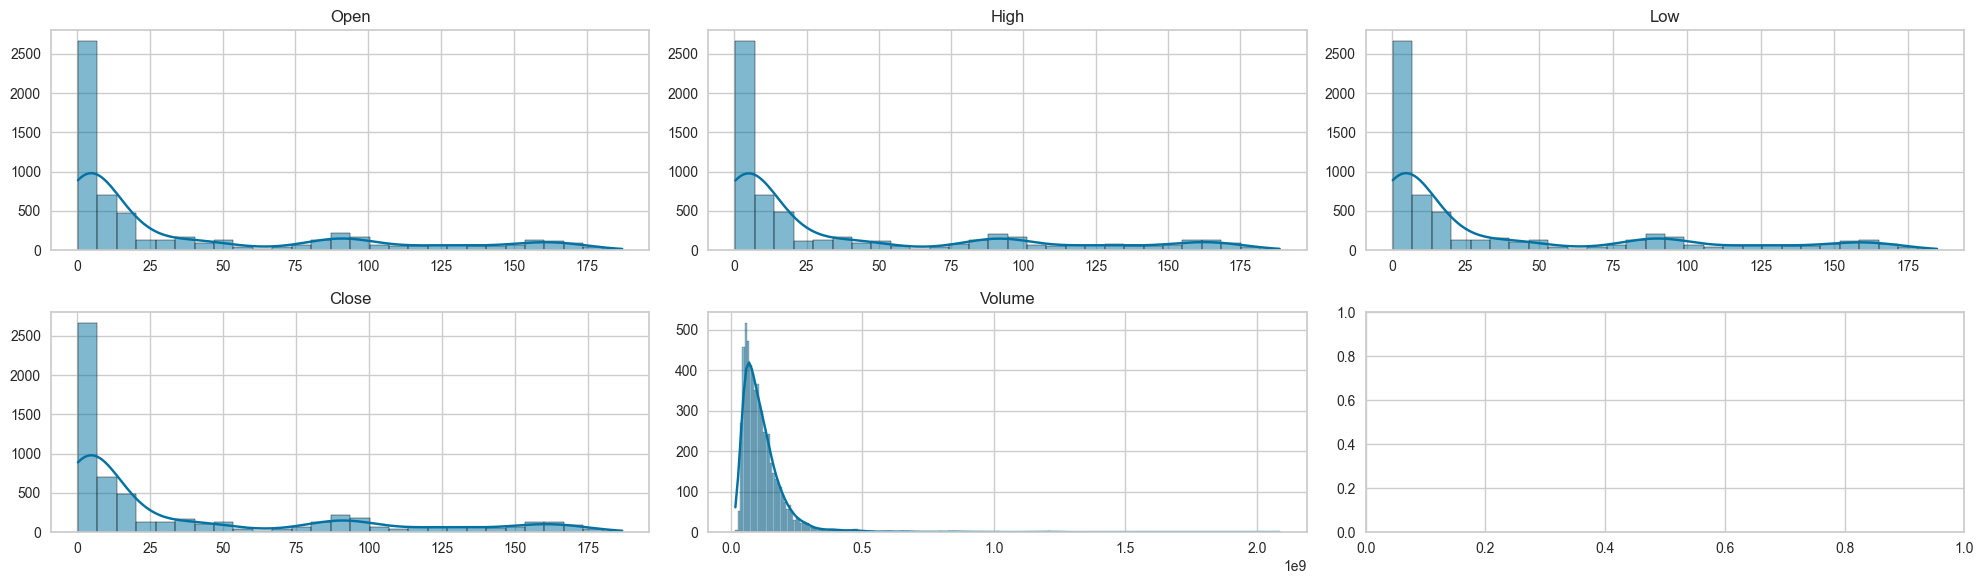

In [16]:
columns = ['Open', 'High', 'Low', 'Close', 'Volume']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

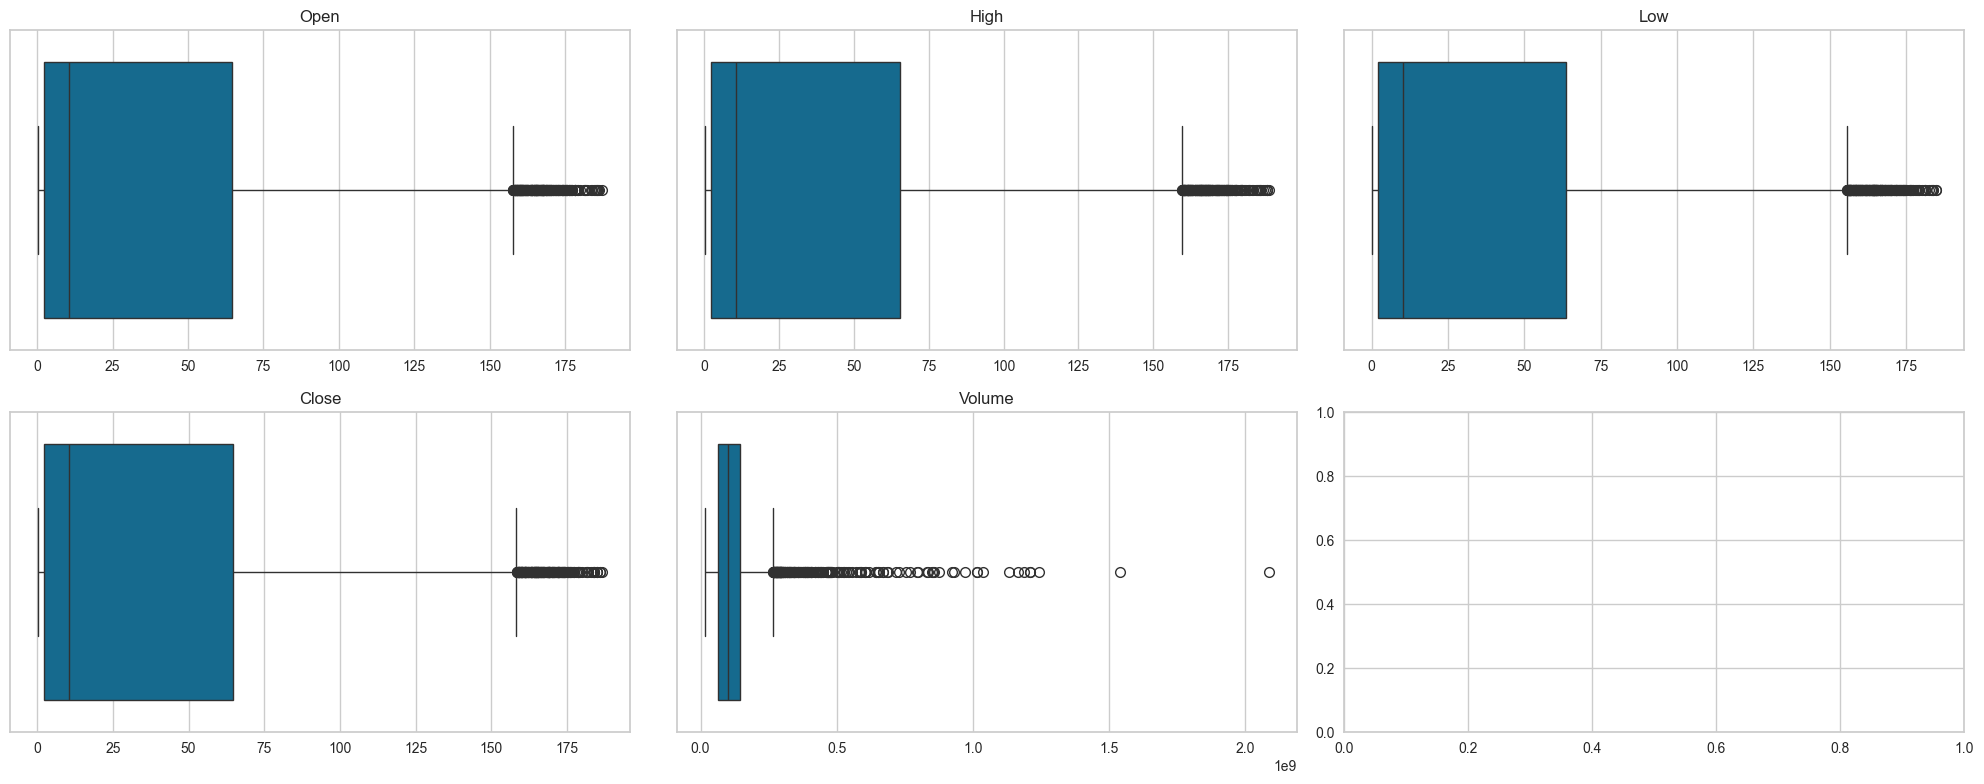

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

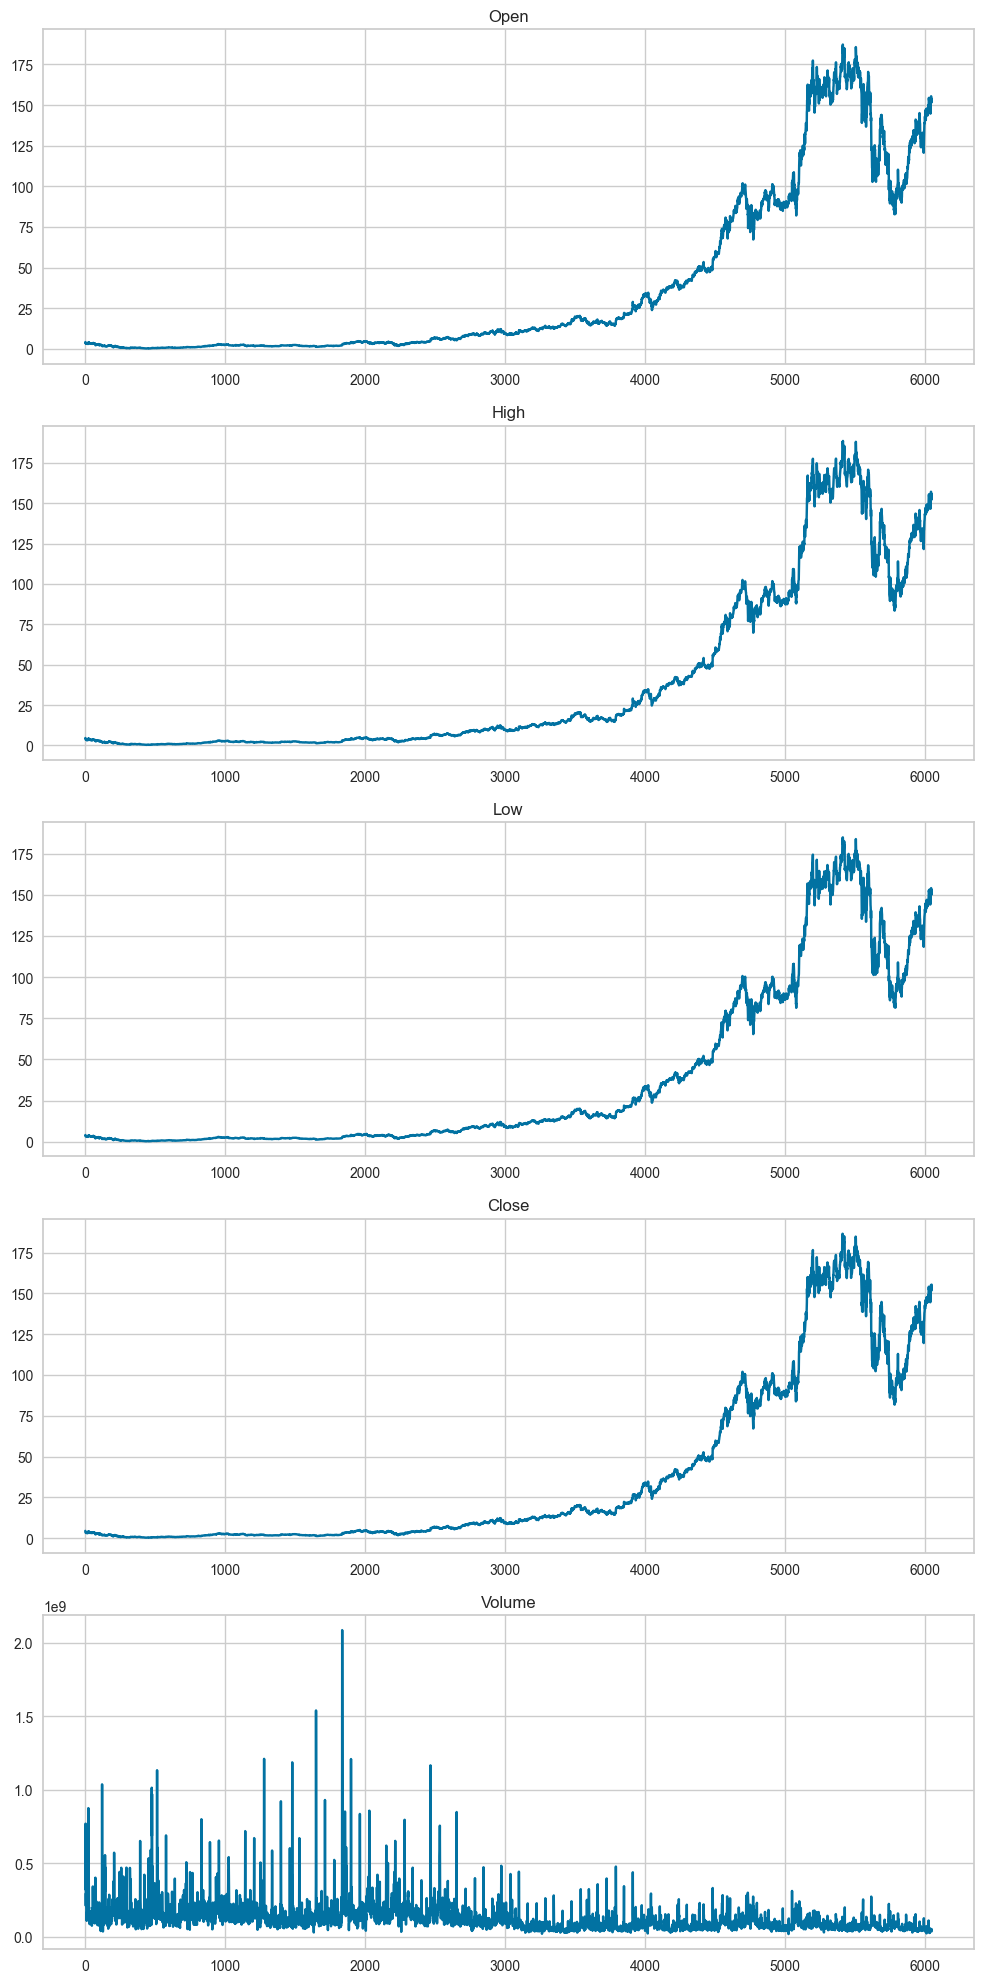

In [35]:

plt.figure(figsize=(10, 5))
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    plt.subplot(5, 1, i+1)
    plt.plot(range(0, 6050), data[column_name])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()